In [53]:
import warnings
warnings.filterwarnings("ignore")

In [54]:
import pandas as pd
df = pd.read_csv("/home/prasun/GitDemo/Stat_ML-Learning/Exercise18/dataset.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [56]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

array([[<Axes: xlabel='Age', ylabel='Age'>,
        <Axes: xlabel='RestingBP', ylabel='Age'>,
        <Axes: xlabel='Cholesterol', ylabel='Age'>,
        <Axes: xlabel='FastingBS', ylabel='Age'>,
        <Axes: xlabel='MaxHR', ylabel='Age'>,
        <Axes: xlabel='Oldpeak', ylabel='Age'>,
        <Axes: xlabel='HeartDisease', ylabel='Age'>],
       [<Axes: xlabel='Age', ylabel='RestingBP'>,
        <Axes: xlabel='RestingBP', ylabel='RestingBP'>,
        <Axes: xlabel='Cholesterol', ylabel='RestingBP'>,
        <Axes: xlabel='FastingBS', ylabel='RestingBP'>,
        <Axes: xlabel='MaxHR', ylabel='RestingBP'>,
        <Axes: xlabel='Oldpeak', ylabel='RestingBP'>,
        <Axes: xlabel='HeartDisease', ylabel='RestingBP'>],
       [<Axes: xlabel='Age', ylabel='Cholesterol'>,
        <Axes: xlabel='RestingBP', ylabel='Cholesterol'>,
        <Axes: xlabel='Cholesterol', ylabel='Cholesterol'>,
        <Axes: xlabel='FastingBS', ylabel='Cholesterol'>,
        <Axes: xlabel='MaxHR', ylabel='Cho

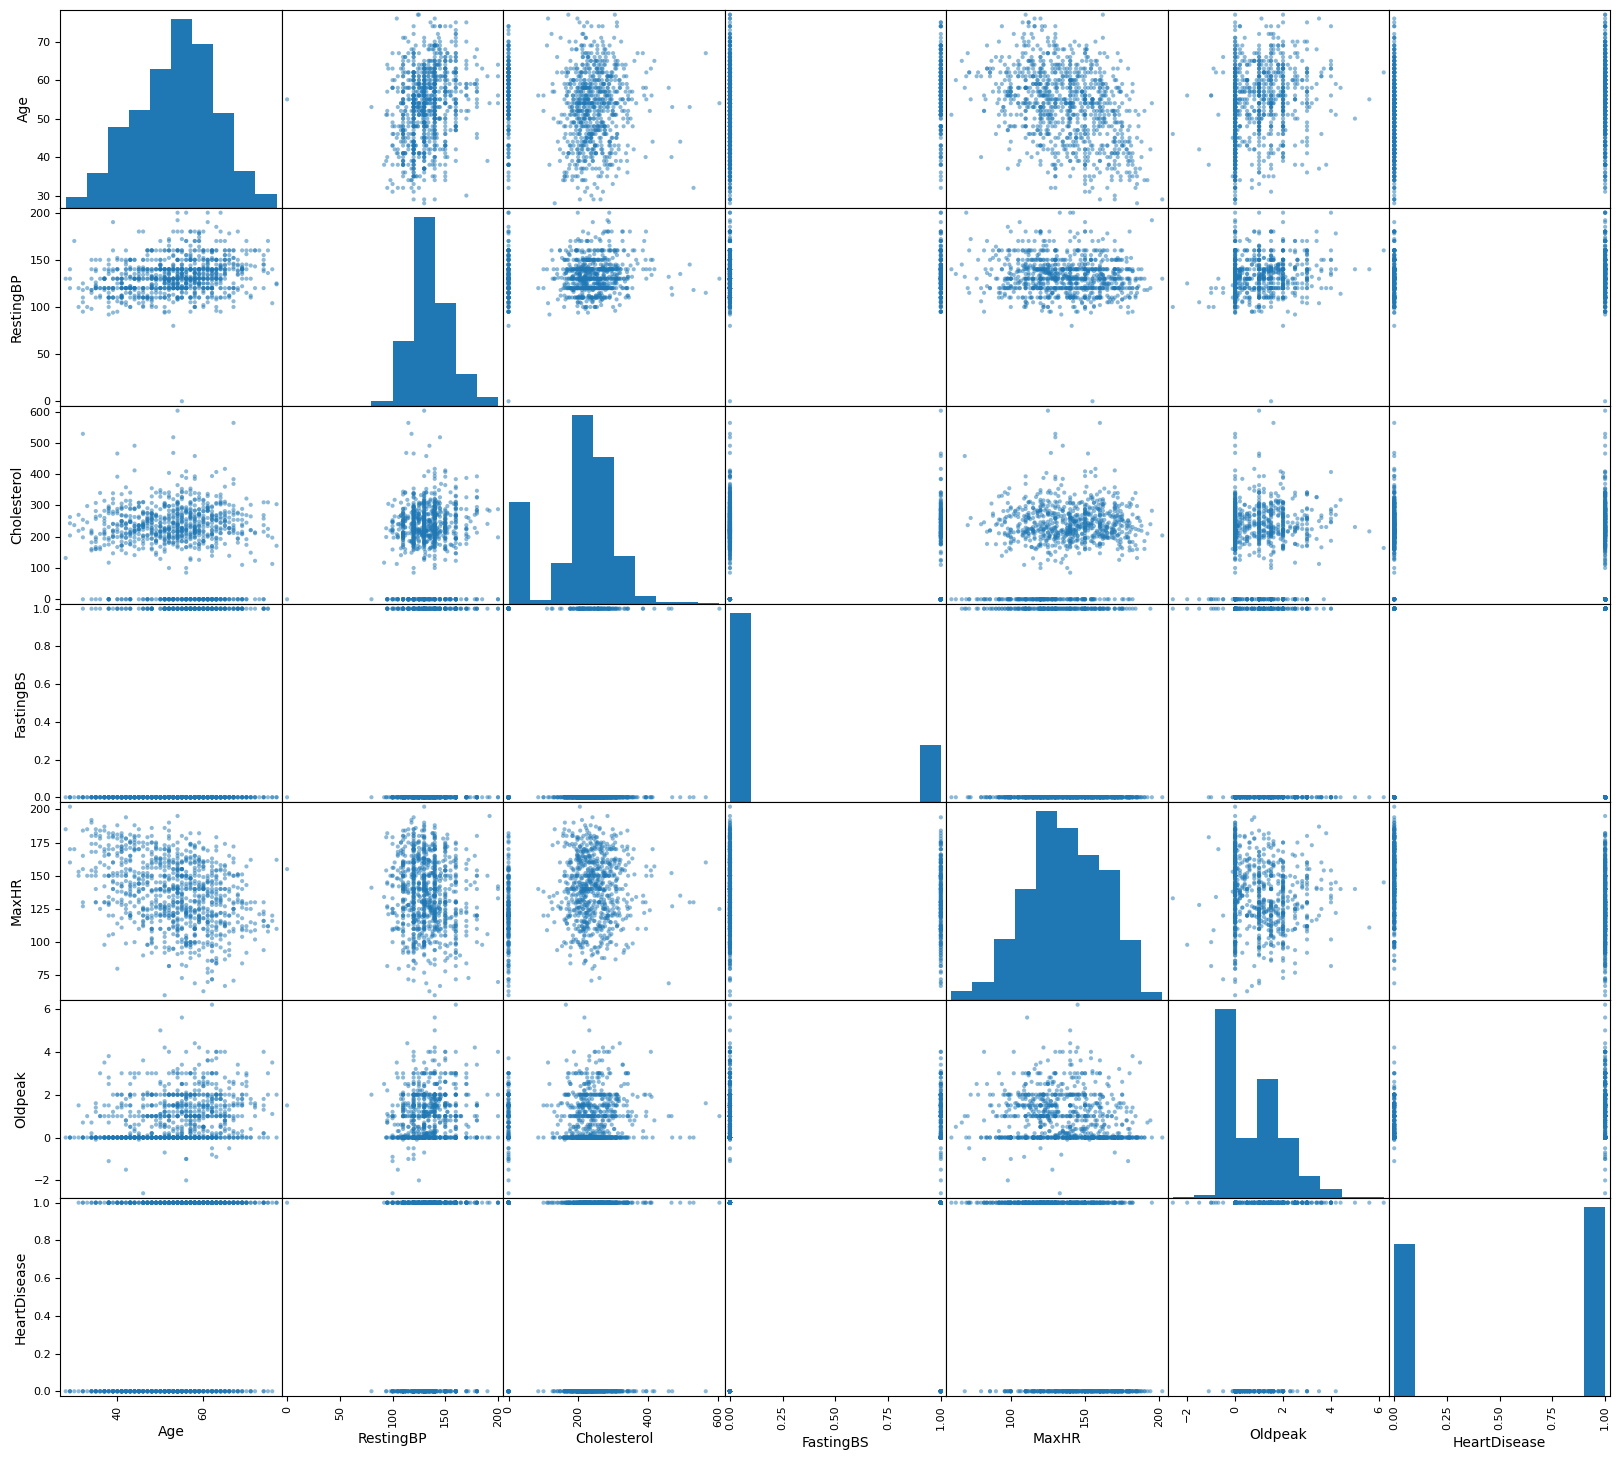

In [57]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize= (20,18))

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [59]:
len(list(df.columns))

12

In [60]:
ls = []
for i in list(df.columns):
    if i not in ["Sex","ChestPainType","RestingECG","ExerciseAngina","ST_Slope"]:
        ls.append(i)

print(ls)


['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']


In [61]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
cl = ColumnTransformer( transformers=
                       [("dummy",OneHotEncoder(),["Sex","ChestPainType","RestingECG","ExerciseAngina","ST_Slope"]),
                        ("scale",MinMaxScaler(),['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak'])],
                        remainder= "drop")
cl_fited = cl.fit_transform(df)
X = cl_fited
y = df.HeartDisease.values

In [73]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

ran1 = RandomizedSearchCV(estimator= SVC(gamma= "auto"),
                   param_distributions={"kernel":['linear', 'poly', 'rbf', 'sigmoid'],"C":[1,10,20,30,50]},
                   cv= 10,
                   n_iter= 15,
                   random_state= 0)
ran2 = RandomizedSearchCV(estimator= BaggingClassifier(SVC(kernel='poly', C= 1)),
                   param_distributions={"n_estimators":[5,10,15,20,25],"max_features":[0.7,0.8,0.9], "max_samples":[0.6,0.7,0.8,0.9]},
                   cv= 10,
                   n_iter= 15,
                   random_state= 0)
ran3 = RandomizedSearchCV(estimator= DecisionTreeClassifier(),
                   param_distributions={"criterion":['gini', 'entropy', 'log_loss']},
                   cv= 10,
                   n_iter= 15,
                   random_state= 0)
ran4 = RandomizedSearchCV(estimator= BaggingClassifier(DecisionTreeClassifier(criterion= "entropy")),
                   param_distributions={"n_estimators":[5,10,15,20,25],"max_features":[0.7,0.8,0.9], "max_samples":[0.6,0.7,0.8,0.9]},
                   cv= 10,
                   n_iter= 15,
                   random_state= 0)
ran5 = RandomizedSearchCV(estimator= RandomForestClassifier(),
                   param_distributions={'criterion':['gini', 'entropy', 'log_loss'], 'min_samples_split':[ 1,5,10,15,20] },
                   cv= 10,
                   n_iter= 15,
                   random_state= 0)

ran1.fit(X,y)
ran2.fit(X,y)
ran3.fit(X,y)
ran4.fit(X,y)
ran5.fit(X,y)

print(f"Stand SVC: {ran1.best_params_}, {ran1.best_score_}")
print(f"Bagged SVC: {ran2.best_params_}, {ran2.best_score_}")
print(f"Stand Tree: {ran3.best_params_}, {ran3.best_score_}")
print(f"Bagged Tree: {ran4.best_params_}, {ran4.best_score_}")
print(f"Random Forest: {ran5.best_params_}, {ran5.best_score_}")

Stand SVC: {'kernel': 'poly', 'C': 1}, 0.8538580984233158
Bagged SVC: {'n_estimators': 15, 'max_samples': 0.6, 'max_features': 0.7}, 0.8484233158146202
Stand Tree: {'criterion': 'entropy'}, 0.8027830864787386
Bagged Tree: {'n_estimators': 25, 'max_samples': 0.6, 'max_features': 0.7}, 0.853834209268992
Random Forest: {'min_samples_split': 10, 'criterion': 'entropy'}, 0.8582298136645962


In [76]:
from sklearn.model_selection import cross_val_score
import numpy as np

x1 = np.mean(cross_val_score(SVC(kernel= "poly", C= 1),X,y,cv=10))
x2 = np.mean(cross_val_score(BaggingClassifier(SVC(kernel='poly', C= 1),n_estimators= 15, max_samples=0.6, max_features=0.9),X,y,cv=10))
x3 = np.mean(cross_val_score(DecisionTreeClassifier(criterion= "entropy"),X,y,cv=10))
x4 = np.mean(cross_val_score(BaggingClassifier(DecisionTreeClassifier(criterion= "entropy"), n_estimators=25, max_samples=0.8, max_features=0.8),X,y,cv=10))
x5 = np.mean(cross_val_score(RandomForestClassifier(min_samples_split = 10, criterion ='entropy'),X,y,cv=10))
print(f"SVC Standalone: {x1}, Bagging: {x2}\nDecision Tree:{x3}, Bagging:{x4}\nRandom Forest:{x5} ")

SVC Standalone: 0.8429885332059245, Bagging: 0.8364309603440038
Decision Tree:0.788616817964644, Bagging:0.8440516005733396
Random Forest:0.8527591973244147 
